In [4]:
import cv2

In [5]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames"

In [6]:


# Path to the video file
video_path = 'data.mp4'

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Release the video capture object
cap.release()

print(f"The frames per second (fps) of the video is: {fps}")


The frames per second (fps) of the video is: 24


In [22]:
frames_count = 0

video_path = 'data.mp4'

cap = cv2.VideoCapture(video_path)

while True:
    
    ret, img = cap.read()
    
    if not ret:
        print("All frames extracted")
        break
        
    frames_count += 1
    filename = extraction_path + "\\frame%d.jpg" % frames_count
    cv2.imwrite(filename, img)

print("Total frames:", frames_count)

# Release the video capture object
cap.release()

All frames extracted
Total frames: 240


# (i) Object Detection and Bounding Boxes

# (ii) Counting People

# (iii) Screen Time Calculation


In [7]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

In [8]:
extraction_path=r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames"

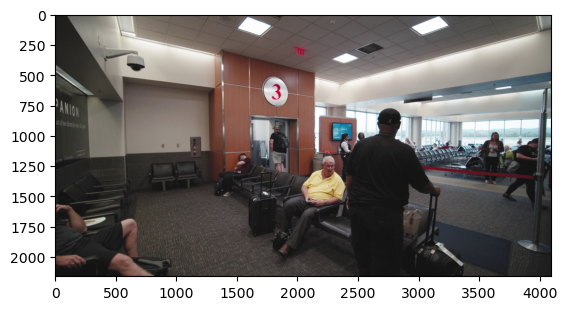

In [9]:
import matplotlib.pyplot as plt
img = plt.imread(r"C:\Users\HARISH A K\Desktop\python\Deep_Learning\Deep_learning_projects\screen_time_and_boundingBox\extraction_frames\frame185.jpg")   # reading image using its name
plt.imshow(img)

In [ ]:
import numpy as np

for i in range(1,241):
    
    frame_path = extraction_path + "\\frame%d.jpg" % i
    image=cv2.imread(frame_path)
    height,width=image.shape[:2]

    
    # Preprocess the frames for yolov
    blob=cv2.dnn.blobFromImage(image,0.00392,(416,416),swapRB=True,crop=False)
    print("Blob ",blob)
    # scaling a pixel - 0.00392=1/255 (by default range is 0,255) , used to adjust brightness and contrast of an image
    
    net.setInput(blob)
    
    # get output
    outs=net.forward(net.getUnconnectedOutLayersNames())
    print("Outs ",outs)
    
#The Blob array contains the image data in a format that can be used by the YOLOv3 model.
#The array has 3 dimensions: the first dimension represents the batch size, the second dimension represents the height of the image, and the third dimension represents the width of the image.
#The Outs array contains the output of the YOLOv3 model, which is a list of detections. Each detection is a dictionary with the following keys:

# x: The x-coordinate of the top left corner of the bounding box.
# y: The y-coordinate of the top left corner of the bounding box.
# w: The width of the bounding box.
# h: The height of the bounding box.
# confidence: The confidence score for the detection.
# classes: The class label for the detection.
    
    # threshold
    conf_threshold=0.5
    nms_threshold=0.4   # non-maximum supression 
    
    # define lists for detection
    class_ids=[]
    confidences=[]
    boxes=[]
    
    # detection process
    
    for out in outs:
        for detection in out:
            scores=detection[5:]
            
            # only takes confidence from the dection library
            
            class_id=np.argmax(scores) # max index confidence value gets stored in class_id
            confidence=scores[class_id]
            
            if confidence>conf_threshold and class_id==0: # class_id = 0 means people 
                center_x=int(detection[0]*width)
                center_y=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)
                x=int(center_x-w/2)
                y=int(center_y-h/2)
                
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x,y,w,h])
    
        #boxes = np.array(boxes)
    
    #confidences = np.array(confidences)

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    count=len(indices)

print("Scores ",scores)
print("Class_ids ",class_ids)
print("Boxes ",boxes)
print("Confidences ",confidences)
print("Indeces ",indices)
print("Length of indeces ",count)
   
                
    
    

Blob  [[[[0.1176  0.1176  0.1176  ... 0.49    0.43904 0.48608]
   [0.1176  0.1176  0.1176  ... 0.46648 0.49    0.53704]
   [0.1176  0.1176  0.1176  ... 0.49    0.53312 0.50176]
   ...
   [0.09408 0.10976 0.11368 ... 0.12152 0.12152 0.1176 ]
   [0.1176  0.12152 0.12936 ... 0.1176  0.1176  0.1176 ]
   [0.15288 0.17248 0.19992 ... 0.12152 0.1176  0.1176 ]]

  [[0.1176  0.1176  0.1176  ... 0.51352 0.45472 0.50176]
   [0.1176  0.1176  0.1176  ... 0.47432 0.49392 0.55272]
   [0.1176  0.1176  0.1176  ... 0.51352 0.5488  0.51744]
   ...
   [0.09408 0.10976 0.11368 ... 0.12152 0.12152 0.1176 ]
   [0.1176  0.12152 0.13328 ... 0.1176  0.1176  0.1176 ]
   [0.1568  0.18032 0.19992 ... 0.12152 0.1176  0.1176 ]]

  [[0.1176  0.1176  0.1176  ... 0.50568 0.4508  0.49784]
   [0.1176  0.1176  0.1176  ... 0.4704  0.49    0.5488 ]
   [0.1176  0.1176  0.1176  ... 0.50568 0.54488 0.51352]
   ...
   [0.09408 0.10976 0.11368 ... 0.12152 0.12152 0.1176 ]
   [0.10584 0.11368 0.12544 ... 0.1176  0.1176  0.1176 ]


Outs  (array([[0.03064513, 0.04496009, 0.41643885, ..., 0.        , 0.        ,
        0.        ],
       [0.04429881, 0.03850245, 0.27614194, ..., 0.        , 0.        ,
        0.        ],
       [0.04898208, 0.04168598, 0.7833202 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94684213, 0.9396605 , 0.31928796, ..., 0.        , 0.        ,
        0.        ],
       [0.96067196, 0.96254474, 0.28691614, ..., 0.        , 0.        ,
        0.        ],
       [0.96790594, 0.9673754 , 0.76499546, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01695418, 0.02381653, 0.05097973, ..., 0.        , 0.        ,
        0.        ],
       [0.01721243, 0.01857896, 0.34857398, ..., 0.        , 0.        ,
        0.        ],
       [0.02158431, 0.01586081, 0.07291289, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9713668 , 0.9710414 , 0.05711499, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03157472, 0.04480093, 0.41759717, ..., 0.        , 0.        ,
        0.        ],
       [0.04557087, 0.03919875, 0.27190045, ..., 0.        , 0.        ,
        0.        ],
       [0.04900735, 0.04237915, 0.7803379 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9494194 , 0.93960774, 0.32856655, ..., 0.        , 0.        ,
        0.        ],
       [0.9623815 , 0.96238136, 0.28852853, ..., 0.        , 0.        ,
        0.        ],
       [0.96796954, 0.96770656, 0.7663548 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01683612, 0.02399103, 0.04958675, ..., 0.        , 0.        ,
        0.        ],
       [0.0170363 , 0.01879608, 0.3539699 , ..., 0.        , 0.        ,
        0.        ],
       [0.02178383, 0.01594318, 0.07199495, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9717542 , 0.9712609 , 0.05707132, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Blob  [[[[0.1176  0.1176  0.1176  ... 0.43904 0.48216 0.52528]
   [0.1176  0.1176  0.1176  ... 0.49    0.53312 0.55664]
   [0.11368 0.11368 0.1176  ... 0.51744 0.47432 0.47824]
   ...
   [0.09408 0.10976 0.1176  ... 0.12544 0.1176  0.12152]
   [0.1176  0.12544 0.1372  ... 0.12152 0.1176  0.1176 ]
   [0.1568  0.1764  0.196   ... 0.12544 0.1176  0.1176 ]]

  [[0.12152 0.12152 0.1176  ... 0.47432 0.50568 0.5488 ]
   [0.1176  0.1176  0.1176  ... 0.5096  0.55664 0.58016]
   [0.11368 0.11368 0.1176  ... 0.55272 0.49784 0.50176]
   ...
   [0.09408 0.10976 0.12152 ... 0.12544 0.1176  0.12152]
   [0.1176  0.12544 0.14112 ... 0.12152 0.1176  0.1176 ]
   [0.16072 0.18032 0.19992 ... 0.12544 0.1176  0.1176 ]]

  [[0.10192 0.10192 0.1176  ... 0.46256 0.49784 0.54096]
   [0.10584 0.10976 0.1176  ... 0.50568 0.5488  0.57232]
   [0.11368 0.11368 0.1176  ... 0.54096 0.49    0.49392]
   ...
   [0.09408 0.10976 0.10192 ... 0.12544 0.1176  0.12152]
   [0.10976 0.1176  0.12152 ... 0.12152 0.1176  0.1176 ]


Outs  (array([[0.03105029, 0.0439361 , 0.4209385 , ..., 0.        , 0.        ,
        0.        ],
       [0.0451959 , 0.03971586, 0.2672745 , ..., 0.        , 0.        ,
        0.        ],
       [0.04900856, 0.04277292, 0.7778894 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95012504, 0.94081616, 0.32277995, ..., 0.        , 0.        ,
        0.        ],
       [0.9589398 , 0.96250576, 0.29109865, ..., 0.        , 0.        ,
        0.        ],
       [0.9672559 , 0.9677875 , 0.7575099 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01699608, 0.02377721, 0.04860369, ..., 0.        , 0.        ,
        0.        ],
       [0.0165964 , 0.01897022, 0.36501727, ..., 0.        , 0.        ,
        0.        ],
       [0.02197879, 0.01590062, 0.07129353, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9718734 , 0.97127587, 0.05714148, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03089962, 0.04375818, 0.41817886, ..., 0.        , 0.        ,
        0.        ],
       [0.044517  , 0.03945201, 0.2698765 , ..., 0.        , 0.        ,
        0.        ],
       [0.04880783, 0.04259499, 0.7758375 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9508717 , 0.9415534 , 0.33217892, ..., 0.        , 0.        ,
        0.        ],
       [0.9612146 , 0.96186566, 0.29082653, ..., 0.        , 0.        ,
        0.        ],
       [0.96701443, 0.96699524, 0.76342493, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01809476, 0.02398507, 0.04950712, ..., 0.        , 0.        ,
        0.        ],
       [0.01681931, 0.01929695, 0.36546797, ..., 0.        , 0.        ,
        0.        ],
       [0.02203685, 0.01632112, 0.07188661, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9717127 , 0.9716252 , 0.05734099, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Blob  [[[[0.1176  0.1176  0.1176  ... 0.47432 0.50568 0.55664]
   [0.1176  0.1176  0.1176  ... 0.5096  0.5292  0.4704 ]
   [0.1176  0.1176  0.1176  ... 0.45864 0.47432 0.50176]
   ...
   [0.10976 0.12544 0.1372  ... 0.12544 0.11368 0.12544]
   [0.13328 0.14896 0.17248 ... 0.12152 0.11368 0.12544]
   [0.19208 0.20384 0.196   ... 0.12152 0.1176  0.12544]]

  [[0.12152 0.12152 0.1176  ... 0.49    0.52136 0.58016]
   [0.1176  0.1176  0.1176  ... 0.5488  0.54488 0.49392]
   [0.1176  0.1176  0.1176  ... 0.49392 0.49    0.52528]
   ...
   [0.10976 0.12936 0.14112 ... 0.12544 0.11368 0.12544]
   [0.1372  0.15288 0.1764  ... 0.12152 0.11368 0.12544]
   [0.196   0.20776 0.19992 ... 0.12152 0.1176  0.12544]]

  [[0.10192 0.10192 0.1176  ... 0.48608 0.51744 0.57232]
   [0.10976 0.10976 0.1176  ... 0.53704 0.54096 0.48608]
   [0.1176  0.1176  0.1176  ... 0.48216 0.48608 0.51744]
   ...
   [0.10192 0.10976 0.12152 ... 0.12544 0.11368 0.12544]
   [0.1176  0.12936 0.15288 ... 0.12152 0.11368 0.12544]


Outs  (array([[0.03101707, 0.04274848, 0.41437656, ..., 0.        , 0.        ,
        0.        ],
       [0.04513536, 0.04002053, 0.26948887, ..., 0.        , 0.        ,
        0.        ],
       [0.04958936, 0.04223978, 0.7774406 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95007586, 0.9409104 , 0.33555502, ..., 0.        , 0.        ,
        0.        ],
       [0.96073604, 0.9631373 , 0.2946374 , ..., 0.        , 0.        ,
        0.        ],
       [0.96697116, 0.96909416, 0.7712142 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01784159, 0.02386411, 0.04852461, ..., 0.        , 0.        ,
        0.        ],
       [0.01666652, 0.01935543, 0.36138532, ..., 0.        , 0.        ,
        0.        ],
       [0.0223284 , 0.01652858, 0.07133795, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97184855, 0.97167677, 0.05691105, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03201564, 0.04347716, 0.41603085, ..., 0.        , 0.        ,
        0.        ],
       [0.04556635, 0.03912711, 0.26903132, ..., 0.        , 0.        ,
        0.        ],
       [0.04965909, 0.04190732, 0.78036934, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94983256, 0.94096637, 0.33681634, ..., 0.        , 0.        ,
        0.        ],
       [0.9601936 , 0.963301  , 0.29729357, ..., 0.        , 0.        ,
        0.        ],
       [0.96721363, 0.96919894, 0.7710501 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01781745, 0.02404263, 0.04777908, ..., 0.        , 0.        ,
        0.        ],
       [0.0171357 , 0.0194922 , 0.36804622, ..., 0.        , 0.        ,
        0.        ],
       [0.02232974, 0.01654815, 0.07120613, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9717752 , 0.97149587, 0.05758698, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03139656, 0.04341199, 0.4191966 , ..., 0.        , 0.        ,
        0.        ],
       [0.04569822, 0.04001031, 0.26688927, ..., 0.        , 0.        ,
        0.        ],
       [0.04942337, 0.04233085, 0.7783458 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.94920933, 0.9404426 , 0.33401248, ..., 0.        , 0.        ,
        0.        ],
       [0.95991254, 0.96293604, 0.29382575, ..., 0.        , 0.        ,
        0.        ],
       [0.96688056, 0.96950847, 0.77616346, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01815346, 0.0237878 , 0.04855527, ..., 0.        , 0.        ,
        0.        ],
       [0.01713696, 0.01928044, 0.36492676, ..., 0.        , 0.        ,
        0.        ],
       [0.02225414, 0.01645791, 0.0707246 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9719178 , 0.9716717 , 0.05742599, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03095767, 0.04216236, 0.4254397 , ..., 0.        , 0.        ,
        0.        ],
       [0.04579809, 0.03959304, 0.27068335, ..., 0.        , 0.        ,
        0.        ],
       [0.04941927, 0.0415068 , 0.77475643, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.950729  , 0.9405638 , 0.3236526 , ..., 0.        , 0.        ,
        0.        ],
       [0.96199006, 0.96197253, 0.28440267, ..., 0.        , 0.        ,
        0.        ],
       [0.9664841 , 0.9685474 , 0.7695909 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01831056, 0.02411852, 0.04858393, ..., 0.        , 0.        ,
        0.        ],
       [0.01674769, 0.01946595, 0.36576238, ..., 0.        , 0.        ,
        0.        ],
       [0.02204045, 0.01661108, 0.07126522, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9709588 , 0.97103155, 0.05968424, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03095816, 0.04242564, 0.4183636 , ..., 0.        , 0.        ,
        0.        ],
       [0.04529037, 0.03972911, 0.2764459 , ..., 0.        , 0.        ,
        0.        ],
       [0.04913801, 0.04182335, 0.7670721 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9504646 , 0.9403776 , 0.3253694 , ..., 0.        , 0.        ,
        0.        ],
       [0.96212095, 0.9617175 , 0.29190725, ..., 0.        , 0.        ,
        0.        ],
       [0.96655077, 0.96790564, 0.7778235 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01837778, 0.02421392, 0.0474729 , ..., 0.        , 0.        ,
        0.        ],
       [0.01673733, 0.01982952, 0.36683524, ..., 0.        , 0.        ,
        0.        ],
       [0.0217465 , 0.01636519, 0.0703996 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9716562 , 0.9714698 , 0.05763856, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Blob  [[[[0.11368 0.1176  0.1176  ... 0.5096  0.45472 0.47824]
   [0.1176  0.1176  0.1176  ... 0.4704  0.49    0.51352]
   [0.1176  0.1176  0.1176  ... 0.49392 0.52136 0.5488 ]
   ...
   [0.1372  0.16072 0.18816 ... 0.11368 0.12152 0.12152]
   [0.19992 0.20776 0.18816 ... 0.1176  0.12544 0.1176 ]
   [0.17248 0.15288 0.10584 ... 0.1176  0.12936 0.11368]]

  [[0.1176  0.12152 0.1176  ... 0.53312 0.47432 0.50176]
   [0.12152 0.12152 0.1176  ... 0.48608 0.50568 0.53704]
   [0.12152 0.12152 0.1176  ... 0.51352 0.54488 0.5684 ]
   ...
   [0.14112 0.16464 0.19208 ... 0.11368 0.12152 0.12152]
   [0.19992 0.20384 0.18424 ... 0.1176  0.12544 0.1176 ]
   [0.1764  0.1372  0.10584 ... 0.1176  0.12936 0.11368]]

  [[0.098   0.10192 0.10976 ... 0.51744 0.45864 0.48608]
   [0.10192 0.10192 0.10976 ... 0.48608 0.50176 0.52136]
   [0.10192 0.10192 0.10976 ... 0.52528 0.5292  0.54488]
   ...
   [0.12152 0.14504 0.16856 ... 0.11368 0.12152 0.12152]
   [0.18032 0.18816 0.16856 ... 0.1176  0.12544 0.1176 ]


Outs  (array([[0.03148218, 0.04378748, 0.42684668, ..., 0.        , 0.        ,
        0.        ],
       [0.0449534 , 0.03851468, 0.27957988, ..., 0.        , 0.        ,
        0.        ],
       [0.05005015, 0.04146129, 0.757859  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9508159 , 0.94102395, 0.3224355 , ..., 0.        , 0.        ,
        0.        ],
       [0.96127117, 0.9612262 , 0.2913172 , ..., 0.        , 0.        ,
        0.        ],
       [0.9670335 , 0.96817154, 0.7655073 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.0179211 , 0.02409687, 0.04736352, ..., 0.        , 0.        ,
        0.        ],
       [0.01685801, 0.01970218, 0.3690739 , ..., 0.        , 0.        ,
        0.        ],
       [0.02240076, 0.01649324, 0.07072991, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97159904, 0.97165495, 0.05762936, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03140003, 0.04418201, 0.42611387, ..., 0.        , 0.        ,
        0.        ],
       [0.04512423, 0.03860724, 0.27483222, ..., 0.        , 0.        ,
        0.        ],
       [0.04973821, 0.04173242, 0.7581399 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95070326, 0.9414831 , 0.33336756, ..., 0.        , 0.        ,
        0.        ],
       [0.9624    , 0.9630126 , 0.29922485, ..., 0.        , 0.        ,
        0.        ],
       [0.9670051 , 0.9690742 , 0.77386415, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.0180859 , 0.02421194, 0.04530209, ..., 0.        , 0.        ,
        0.        ],
       [0.01619804, 0.01932619, 0.37495968, ..., 0.        , 0.        ,
        0.        ],
       [0.02202668, 0.01663092, 0.06939178, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9712586 , 0.97267956, 0.05566607, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03182475, 0.04232899, 0.4336071 , ..., 0.        , 0.        ,
        0.        ],
       [0.04647155, 0.04055721, 0.272686  , ..., 0.        , 0.        ,
        0.        ],
       [0.04905405, 0.04175796, 0.7652449 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95060146, 0.9411264 , 0.33133894, ..., 0.        , 0.        ,
        0.        ],
       [0.9624062 , 0.9632009 , 0.29359385, ..., 0.        , 0.        ,
        0.        ],
       [0.96790403, 0.96841216, 0.76118094, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01770544, 0.02413223, 0.04615764, ..., 0.        , 0.        ,
        0.        ],
       [0.01665821, 0.01959176, 0.37832546, ..., 0.        , 0.        ,
        0.        ],
       [0.0219246 , 0.01668801, 0.07004895, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.971     , 0.9724354 , 0.05726516, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03119169, 0.04282552, 0.435211  , ..., 0.        , 0.        ,
        0.        ],
       [0.04467304, 0.03902651, 0.27974388, ..., 0.        , 0.        ,
        0.        ],
       [0.04941671, 0.04133591, 0.75992787, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9491618 , 0.9409176 , 0.34078738, ..., 0.        , 0.        ,
        0.        ],
       [0.9612563 , 0.9630772 , 0.2960589 , ..., 0.        , 0.        ,
        0.        ],
       [0.96702415, 0.96847004, 0.7530651 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01829793, 0.02436074, 0.04617107, ..., 0.        , 0.        ,
        0.        ],
       [0.01654785, 0.01947776, 0.37492532, ..., 0.        , 0.        ,
        0.        ],
       [0.02175615, 0.0168506 , 0.06966651, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97136414, 0.97230405, 0.05636097, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.030556  , 0.04349463, 0.4225106 , ..., 0.        , 0.        ,
        0.        ],
       [0.04423708, 0.03967465, 0.28180924, ..., 0.        , 0.        ,
        0.        ],
       [0.04966642, 0.04117058, 0.76006293, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9508452 , 0.94210935, 0.32722425, ..., 0.        , 0.        ,
        0.        ],
       [0.96212   , 0.96330833, 0.29297006, ..., 0.        , 0.        ,
        0.        ],
       [0.9673513 , 0.96871006, 0.7851048 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.0183301 , 0.02422043, 0.04692379, ..., 0.        , 0.        ,
        0.        ],
       [0.01649073, 0.01947725, 0.36907133, ..., 0.        , 0.        ,
        0.        ],
       [0.0216161 , 0.01695852, 0.06960791, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9707054 , 0.97313076, 0.05702015, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03087148, 0.04271502, 0.4240474 , ..., 0.        , 0.        ,
        0.        ],
       [0.04417437, 0.03900062, 0.2798681 , ..., 0.        , 0.        ,
        0.        ],
       [0.04932377, 0.04009041, 0.7645264 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95092225, 0.9429245 , 0.338031  , ..., 0.        , 0.        ,
        0.        ],
       [0.9613669 , 0.9636155 , 0.30035013, ..., 0.        , 0.        ,
        0.        ],
       [0.96555614, 0.9679948 , 0.7729666 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01796251, 0.02403415, 0.04715561, ..., 0.        , 0.        ,
        0.        ],
       [0.01664879, 0.01924324, 0.3751083 , ..., 0.        , 0.        ,
        0.        ],
       [0.02190831, 0.01690937, 0.06987457, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.971193  , 0.97251725, 0.05537788, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03072735, 0.0419282 , 0.42737186, ..., 0.        , 0.        ,
        0.        ],
       [0.04444361, 0.04061439, 0.2762471 , ..., 0.        , 0.        ,
        0.        ],
       [0.04924742, 0.04142324, 0.7624433 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9506638 , 0.94198257, 0.33693886, ..., 0.        , 0.        ,
        0.        ],
       [0.9610701 , 0.9626518 , 0.29818135, ..., 0.        , 0.        ,
        0.        ],
       [0.9668884 , 0.96901286, 0.7729647 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.0185719 , 0.0240503 , 0.04767587, ..., 0.        , 0.        ,
        0.        ],
       [0.01639514, 0.01931895, 0.37036544, ..., 0.        , 0.        ,
        0.        ],
       [0.02190845, 0.01695823, 0.0700371 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97113746, 0.97269475, 0.05562466, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.02959479, 0.04195866, 0.42043537, ..., 0.        , 0.        ,
        0.        ],
       [0.04324942, 0.03961513, 0.28166565, ..., 0.        , 0.        ,
        0.        ],
       [0.04924546, 0.04089706, 0.76027834, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.950281  , 0.9411812 , 0.33339617, ..., 0.        , 0.        ,
        0.        ],
       [0.96199125, 0.96319675, 0.29727   , ..., 0.        , 0.        ,
        0.        ],
       [0.9660868 , 0.9693506 , 0.7846421 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01815287, 0.02393221, 0.04664867, ..., 0.        , 0.        ,
        0.        ],
       [0.01657715, 0.01898305, 0.37664765, ..., 0.        , 0.        ,
        0.        ],
       [0.02170292, 0.01705573, 0.06929766, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97109103, 0.9731092 , 0.05465299, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03009271, 0.04206363, 0.4195432 , ..., 0.        , 0.        ,
        0.        ],
       [0.04399168, 0.04013913, 0.28091532, ..., 0.        , 0.        ,
        0.        ],
       [0.04966235, 0.04071695, 0.76348794, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9503355 , 0.941824  , 0.3387592 , ..., 0.        , 0.        ,
        0.        ],
       [0.9628171 , 0.9635859 , 0.30040905, ..., 0.        , 0.        ,
        0.        ],
       [0.9654623 , 0.9688279 , 0.7890386 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01889694, 0.02405294, 0.04758239, ..., 0.        , 0.        ,
        0.        ],
       [0.01621028, 0.01883217, 0.3702319 , ..., 0.        , 0.        ,
        0.        ],
       [0.02203464, 0.01721236, 0.06935202, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9713602 , 0.9735293 , 0.05375586, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03117376, 0.04282639, 0.40730312, ..., 0.        , 0.        ,
        0.        ],
       [0.04504918, 0.03964591, 0.273952  , ..., 0.        , 0.        ,
        0.        ],
       [0.04997462, 0.04078677, 0.7581934 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9516628 , 0.9433083 , 0.3409018 , ..., 0.        , 0.        ,
        0.        ],
       [0.9617317 , 0.96330553, 0.30028474, ..., 0.        , 0.        ,
        0.        ],
       [0.96559834, 0.96916986, 0.78358567, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01902002, 0.02426531, 0.04634879, ..., 0.        , 0.        ,
        0.        ],
       [0.01641559, 0.01908929, 0.37452596, ..., 0.        , 0.        ,
        0.        ],
       [0.02200712, 0.01722037, 0.06949322, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9720013 , 0.97357726, 0.05240473, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03094172, 0.04327945, 0.3991497 , ..., 0.        , 0.        ,
        0.        ],
       [0.04432547, 0.03943194, 0.27276838, ..., 0.        , 0.        ,
        0.        ],
       [0.04960605, 0.04075344, 0.75842375, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9504779 , 0.94247615, 0.34135845, ..., 0.        , 0.        ,
        0.        ],
       [0.96193534, 0.9639364 , 0.3036509 , ..., 0.        , 0.        ,
        0.        ],
       [0.96560824, 0.96913505, 0.78074837, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01913416, 0.02433196, 0.04670073, ..., 0.        , 0.        ,
        0.        ],
       [0.01626115, 0.01894178, 0.37573785, ..., 0.        , 0.        ,
        0.        ],
       [0.02223127, 0.01700591, 0.07002629, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97151715, 0.97330505, 0.05394314, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03206598, 0.0444957 , 0.40650576, ..., 0.        , 0.        ,
        0.        ],
       [0.04478625, 0.038531  , 0.2671103 , ..., 0.        , 0.        ,
        0.        ],
       [0.04992633, 0.04069615, 0.7645541 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9510432 , 0.9431611 , 0.34031737, ..., 0.        , 0.        ,
        0.        ],
       [0.96247566, 0.9641125 , 0.30075637, ..., 0.        , 0.        ,
        0.        ],
       [0.96632034, 0.9692784 , 0.7804757 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01948535, 0.02450911, 0.0461645 , ..., 0.        , 0.        ,
        0.        ],
       [0.01666781, 0.01913412, 0.37579158, ..., 0.        , 0.        ,
        0.        ],
       [0.02256543, 0.01742513, 0.07059688, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97163415, 0.9736488 , 0.05406648, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03137572, 0.04301039, 0.41142863, ..., 0.        , 0.        ,
        0.        ],
       [0.044522  , 0.03850042, 0.26800755, ..., 0.        , 0.        ,
        0.        ],
       [0.04984439, 0.04050109, 0.7655666 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95204026, 0.94272864, 0.3425654 , ..., 0.        , 0.        ,
        0.        ],
       [0.9616765 , 0.9629595 , 0.29999346, ..., 0.        , 0.        ,
        0.        ],
       [0.9672418 , 0.9704367 , 0.76948917, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01932902, 0.02459858, 0.04618166, ..., 0.        , 0.        ,
        0.        ],
       [0.01690288, 0.0192258 , 0.37431148, ..., 0.        , 0.        ,
        0.        ],
       [0.02250448, 0.0171948 , 0.07017325, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97146773, 0.973838  , 0.05421427, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Blob  [[[[0.11368 0.11368 0.1176  ... 0.43512 0.43904 0.44688]
   [0.11368 0.11368 0.11368 ... 0.43904 0.45472 0.46648]
   [0.11368 0.11368 0.1176  ... 0.46648 0.43512 0.45864]
   ...
   [0.20384 0.19992 0.16464 ... 0.11368 0.1176  0.1176 ]
   [0.14896 0.12152 0.098   ... 0.11368 0.10976 0.1176 ]
   [0.08624 0.08232 0.07056 ... 0.11368 0.10584 0.10976]]

  [[0.11368 0.11368 0.1176  ... 0.4508  0.46256 0.4704 ]
   [0.11368 0.11368 0.11368 ... 0.45864 0.49392 0.49392]
   [0.11368 0.11368 0.1176  ... 0.49    0.47432 0.48216]
   ...
   [0.19992 0.196   0.1568  ... 0.11368 0.1176  0.1176 ]
   [0.14504 0.11368 0.098   ... 0.11368 0.10976 0.1176 ]
   [0.08624 0.08232 0.0784  ... 0.11368 0.10584 0.10976]]

  [[0.10584 0.10584 0.10976 ... 0.44688 0.45472 0.46256]
   [0.11368 0.10584 0.10976 ... 0.45472 0.47824 0.48216]
   [0.11368 0.11368 0.1176  ... 0.49    0.46256 0.47432]
   ...
   [0.18424 0.19992 0.16072 ... 0.11368 0.1176  0.1176 ]
   [0.14504 0.1176  0.098   ... 0.11368 0.10976 0.1176 ]


Outs  (array([[0.03130303, 0.04474011, 0.41482085, ..., 0.        , 0.        ,
        0.        ],
       [0.04469901, 0.03881172, 0.26248172, ..., 0.        , 0.        ,
        0.        ],
       [0.05017603, 0.04094514, 0.7635616 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9519279 , 0.9427964 , 0.34990594, ..., 0.        , 0.        ,
        0.        ],
       [0.9623702 , 0.9627199 , 0.3008755 , ..., 0.        , 0.        ,
        0.        ],
       [0.9669534 , 0.96990734, 0.77439266, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01917979, 0.02433623, 0.0460551 , ..., 0.        , 0.        ,
        0.        ],
       [0.01645509, 0.01880293, 0.3786445 , ..., 0.        , 0.        ,
        0.        ],
       [0.02273881, 0.01711025, 0.07055192, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97109723, 0.9743039 , 0.05302056, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.0310366 , 0.04396053, 0.42661586, ..., 0.        , 0.        ,
        0.        ],
       [0.0448248 , 0.03912838, 0.2725158 , ..., 0.        , 0.        ,
        0.        ],
       [0.050554  , 0.04102941, 0.76063454, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9510344 , 0.9429921 , 0.36080468, ..., 0.        , 0.        ,
        0.        ],
       [0.9618464 , 0.962725  , 0.30655068, ..., 0.        , 0.        ,
        0.        ],
       [0.96682286, 0.9695555 , 0.78308743, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01878874, 0.02412314, 0.0455    , ..., 0.        , 0.        ,
        0.        ],
       [0.0163237 , 0.018629  , 0.38265264, ..., 0.        , 0.        ,
        0.        ],
       [0.0224021 , 0.01691631, 0.06993157, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9713727 , 0.9742361 , 0.05308343, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03076622, 0.04380929, 0.42343232, ..., 0.        , 0.        ,
        0.        ],
       [0.04460108, 0.03983498, 0.2716753 , ..., 0.        , 0.        ,
        0.        ],
       [0.04989178, 0.04108068, 0.75964683, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9507955 , 0.9435891 , 0.35503715, ..., 0.        , 0.        ,
        0.        ],
       [0.96103203, 0.9633968 , 0.30932018, ..., 0.        , 0.        ,
        0.        ],
       [0.9658488 , 0.97017926, 0.78613365, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01899863, 0.02397925, 0.04516228, ..., 0.        , 0.        ,
        0.        ],
       [0.01630289, 0.01845917, 0.38529268, ..., 0.        , 0.        ,
        0.        ],
       [0.02215494, 0.01713175, 0.0694009 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.971421  , 0.97440743, 0.05348158, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.02973291, 0.04412562, 0.41590533, ..., 0.        , 0.        ,
        0.        ],
       [0.04319276, 0.03990674, 0.27389842, ..., 0.        , 0.        ,
        0.        ],
       [0.04894422, 0.04143644, 0.7588351 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9515423 , 0.9432198 , 0.36033493, ..., 0.        , 0.        ,
        0.        ],
       [0.9612754 , 0.9628772 , 0.3067125 , ..., 0.        , 0.        ,
        0.        ],
       [0.9648424 , 0.9694402 , 0.78064114, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01926968, 0.02371545, 0.04644933, ..., 0.        , 0.        ,
        0.        ],
       [0.01618545, 0.01846502, 0.38667637, ..., 0.        , 0.        ,
        0.        ],
       [0.02174239, 0.01680999, 0.06957709, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9712924 , 0.974079  , 0.05431237, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.02994958, 0.04256804, 0.42096716, ..., 0.        , 0.        ,
        0.        ],
       [0.04332165, 0.03923263, 0.2797303 , ..., 0.        , 0.        ,
        0.        ],
       [0.04933811, 0.04048267, 0.7652886 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95047575, 0.9428504 , 0.35313275, ..., 0.        , 0.        ,
        0.        ],
       [0.9626974 , 0.96233946, 0.3042509 , ..., 0.        , 0.        ,
        0.        ],
       [0.96503866, 0.96858627, 0.7843162 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01904597, 0.02368056, 0.04575649, ..., 0.        , 0.        ,
        0.        ],
       [0.01661997, 0.0184128 , 0.38806817, ..., 0.        , 0.        ,
        0.        ],
       [0.02187239, 0.01683208, 0.06977984, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97114825, 0.97411484, 0.05468321, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03072659, 0.04219862, 0.41812727, ..., 0.        , 0.        ,
        0.        ],
       [0.04406571, 0.03947208, 0.27650112, ..., 0.        , 0.        ,
        0.        ],
       [0.04938761, 0.04055572, 0.7602578 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95188195, 0.94503784, 0.36041462, ..., 0.        , 0.        ,
        0.        ],
       [0.96273434, 0.96250355, 0.30971783, ..., 0.        , 0.        ,
        0.        ],
       [0.96565557, 0.9678329 , 0.78428644, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01965913, 0.02377773, 0.04595429, ..., 0.        , 0.        ,
        0.        ],
       [0.01624351, 0.01854293, 0.3842082 , ..., 0.        , 0.        ,
        0.        ],
       [0.02199672, 0.01689094, 0.06962585, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9719528 , 0.97500145, 0.0531822 , ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03031967, 0.04195988, 0.41453996, ..., 0.        , 0.        ,
        0.        ],
       [0.04425502, 0.04040233, 0.27113536, ..., 0.        , 0.        ,
        0.        ],
       [0.04892081, 0.041086  , 0.76889104, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9520988 , 0.9447285 , 0.3559802 , ..., 0.        , 0.        ,
        0.        ],
       [0.9629965 , 0.9622134 , 0.3093739 , ..., 0.        , 0.        ,
        0.        ],
       [0.9643914 , 0.9670538 , 0.77815044, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01907558, 0.02420689, 0.04541335, ..., 0.        , 0.        ,
        0.        ],
       [0.01659449, 0.01876626, 0.38145864, ..., 0.        , 0.        ,
        0.        ],
       [0.02185423, 0.01689183, 0.06935141, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9721714 , 0.9753131 , 0.05257195, ..., 0.        , 0.        ,
        0.        ],
       [0.98

Outs  (array([[0.03104448, 0.04195982, 0.4199758 , ..., 0.        , 0.        ,
        0.        ],
       [0.04302039, 0.0396686 , 0.2663984 , ..., 0.        , 0.        ,
        0.        ],
       [0.0493913 , 0.04108519, 0.773281  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95021725, 0.9432635 , 0.34733942, ..., 0.        , 0.        ,
        0.        ],
       [0.96031064, 0.96219796, 0.30703264, ..., 0.        , 0.        ,
        0.        ],
       [0.9643042 , 0.9670651 , 0.7702134 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01927508, 0.02397794, 0.04623306, ..., 0.        , 0.        ,
        0.        ],
       [0.01637447, 0.018939  , 0.3827642 , ..., 0.        , 0.        ,
        0.        ],
       [0.02215555, 0.01701681, 0.06955333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97139174, 0.9740905 , 0.0538235 , ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03079162, 0.04199495, 0.42170766, ..., 0.        , 0.        ,
        0.        ],
       [0.04250035, 0.03922949, 0.269881  , ..., 0.        , 0.        ,
        0.        ],
       [0.04922638, 0.04055344, 0.7744221 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9513954 , 0.94439226, 0.3424797 , ..., 0.        , 0.        ,
        0.        ],
       [0.96335   , 0.9635688 , 0.30119523, ..., 0.        , 0.        ,
        0.        ],
       [0.96494484, 0.96827614, 0.796386  , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01931386, 0.02381452, 0.04688488, ..., 0.        , 0.        ,
        0.        ],
       [0.0164198 , 0.01886392, 0.38617447, ..., 0.        , 0.        ,
        0.        ],
       [0.02228621, 0.01728105, 0.07062877, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97227836, 0.9742811 , 0.05252122, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03053433, 0.04199587, 0.41844314, ..., 0.        , 0.        ,
        0.        ],
       [0.04259253, 0.03941009, 0.27038872, ..., 0.        , 0.        ,
        0.        ],
       [0.04916236, 0.04066956, 0.76978046, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9520985 , 0.9447909 , 0.3405922 , ..., 0.        , 0.        ,
        0.        ],
       [0.96432817, 0.962312  , 0.299361  , ..., 0.        , 0.        ,
        0.        ],
       [0.9657575 , 0.9682842 , 0.7811966 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01918619, 0.02380506, 0.04635466, ..., 0.        , 0.        ,
        0.        ],
       [0.01635348, 0.01876124, 0.38490897, ..., 0.        , 0.        ,
        0.        ],
       [0.02234503, 0.0174324 , 0.0704235 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97200215, 0.97418785, 0.05273241, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03013488, 0.04183748, 0.4247187 , ..., 0.        , 0.        ,
        0.        ],
       [0.04279414, 0.03977604, 0.2731645 , ..., 0.        , 0.        ,
        0.        ],
       [0.04923771, 0.04069   , 0.7701876 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9518968 , 0.94439286, 0.33746153, ..., 0.        , 0.        ,
        0.        ],
       [0.9635538 , 0.96219575, 0.29346305, ..., 0.        , 0.        ,
        0.        ],
       [0.9656549 , 0.9674148 , 0.767842  , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01875176, 0.02397272, 0.04595504, ..., 0.        , 0.        ,
        0.        ],
       [0.01616506, 0.01864206, 0.3867691 , ..., 0.        , 0.        ,
        0.        ],
       [0.02236123, 0.01731229, 0.06989911, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9717256 , 0.97419894, 0.05350124, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03039893, 0.04217583, 0.4184673 , ..., 0.        , 0.        ,
        0.        ],
       [0.04276891, 0.03955941, 0.26630577, ..., 0.        , 0.        ,
        0.        ],
       [0.04866962, 0.04084652, 0.7731157 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95151037, 0.9447049 , 0.34838757, ..., 0.        , 0.        ,
        0.        ],
       [0.9621788 , 0.9630902 , 0.29770967, ..., 0.        , 0.        ,
        0.        ],
       [0.964118  , 0.9685174 , 0.76950973, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01913561, 0.02395353, 0.04639868, ..., 0.        , 0.        ,
        0.        ],
       [0.01592228, 0.01864884, 0.38265243, ..., 0.        , 0.        ,
        0.        ],
       [0.02233267, 0.01733234, 0.07025767, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9720075 , 0.97468877, 0.05187877, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03067625, 0.04240048, 0.42409256, ..., 0.        , 0.        ,
        0.        ],
       [0.0428583 , 0.03945247, 0.27243358, ..., 0.        , 0.        ,
        0.        ],
       [0.04905497, 0.04111578, 0.7698466 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9497911 , 0.94359714, 0.34175274, ..., 0.        , 0.        ,
        0.        ],
       [0.9633826 , 0.9637851 , 0.29620445, ..., 0.        , 0.        ,
        0.        ],
       [0.9643316 , 0.9679069 , 0.7821805 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01941916, 0.02381144, 0.04633525, ..., 0.        , 0.        ,
        0.        ],
       [0.01613017, 0.01868825, 0.38274658, ..., 0.        , 0.        ,
        0.        ],
       [0.02214573, 0.01736393, 0.06990422, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97263515, 0.9749602 , 0.05030961, ..., 0.        , 0.        ,
        0.        ],
       [0.97

Outs  (array([[0.03047078, 0.04394605, 0.4237313 , ..., 0.        , 0.        ,
        0.        ],
       [0.04281066, 0.03857242, 0.27420267, ..., 0.        , 0.        ,
        0.        ],
       [0.04955605, 0.04105808, 0.76642376, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9517014 , 0.944835  , 0.35389063, ..., 0.        , 0.        ,
        0.        ],
       [0.96238816, 0.9637598 , 0.298777  , ..., 0.        , 0.        ,
        0.        ],
       [0.96414816, 0.96881896, 0.77990544, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01895806, 0.02421185, 0.0461789 , ..., 0.        , 0.        ,
        0.        ],
       [0.01618439, 0.01882889, 0.3901568 , ..., 0.        , 0.        ,
        0.        ],
       [0.02227451, 0.01763852, 0.07020139, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97303736, 0.975731  , 0.04886226, ..., 0.        , 0.        ,
        0.        ],
       [0.97